In [41]:
import pandas as pd
from itertools import combinations
from time import time
from bfs_v2 import buscaBFS
from astar import aStar
import matplotlib.pyplot as plt

df = pd.read_csv('graph.csv', index_col=0)

# 33 cidades -> 528 pares
cidades = df.index.tolist()
duplas_cidades = list(combinations(cidades, 2))

# BFS
nos_visitados_lista = []
tempos_bfs = []

for dupla in duplas_cidades:
    origem, destino = dupla
    inicio = time()
    _, _, num_visitados = buscaBFS('3', origem, destino)
    tempos_bfs.append(time() - inicio)
    nos_visitados_lista.append(num_visitados)

frequencia = {}
for num in nos_visitados_lista:
    frequencia[num] = frequencia.get(num, 0) + 1


# A*
nos_visitados_lista2 = []
tempos_a = []
erros = []

for dupla in duplas_cidades:
    origem, destino = dupla
    inicio = time()
    _, _, num_visitados = aStar('3', origem, destino)  
    if num_visitados > 33:
        print(origem, destino)    
    tempos_a.append(time() - inicio)
    nos_visitados_lista2.append(num_visitados)

frequencia2 = {}
for num in nos_visitados_lista2:
    frequencia2[num] = frequencia2.get(num, 0) + 1

Ilhabela Pouso Alegre


In [38]:
import numpy as np

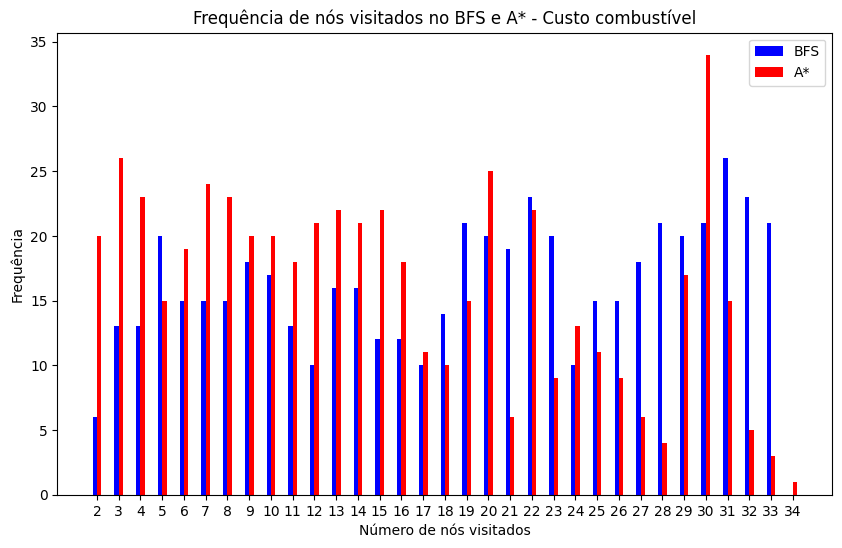

In [39]:
# Pegar as chaves únicas dos dois dicionários
chaves = sorted(set(frequencia.keys()) | set(frequencia2.keys()))

# Calcular a largura das barras
largura = 0.2  # Aumente ou diminua conforme necessário

# Definir as posições das barras
posicoes = np.arange(len(chaves))

# Aumentar a largura da figura
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme desejado

# Criar o gráfico de barras
barras1 = plt.bar(posicoes - largura / 2, [frequencia.get(chave, 0) for chave in chaves], largura, color='blue', label='BFS')
barras2 = plt.bar(posicoes + largura / 2, [frequencia2.get(chave, 0) for chave in chaves], largura, color='red', label='A*')

# Configurações adicionais do gráfico
plt.xlabel('Número de nós visitados')
plt.ylabel('Frequência')
plt.title('Frequência de nós visitados no BFS e A* - Custo combustível')
plt.xticks(posicoes, chaves)
plt.legend()

plt.show()